# Custom Training with Tensorflow 2.0 

## What you'll learn in this course 

Now that we've seen the basics related to Tensorflow 2.0 and Keras in Deep Learning, we could stop there and you'd already know most of what's going on today. 

However, it will surely happen to you on your journey to Deep Learning that you will need to create custom templates that will need costing, layers and custom training. This happens especially when using GAN (Generative Adversarial Networks) algorithms. 

To reach this level, we will first learn how to create custom training, then we will see how we can create models and custom cost functions. 

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf 
import numpy as np 

## Creating a custom linear regression model

To simply understand how a Machine Learning model with a custom training loop works, we will create a very simple linear regression model. 

This model will have to arrive at the following equation: 

$$y = 3x + 2$$

We are going to define variables in a random way then we will converge to this result thanks to the cost function _MSE_.

In [2]:
# Define the model 

class Model(object):
    def __init__(self):
    
        self.W = tf.Variable(float(np.random.randn(1)))
        self.b = tf.Variable(float(np.random.randn(1)))

    def __call__(self, x):
        return self.W * x + self.b

model = Model()

Here we define a very simple class that will be our model. It is initialized with two random variables: 

* $W$ --> _weight_ or the coefficient 
* $b$ --> _constant_ or the constant 


We then define a function *__call__* which will return the equation of a simple linear regression. We can then create an instance of the model and make a first prediction for $x = 3$.

In [3]:
model(3.0).numpy()

-0.832735

If we wanted to get $3x+2$ we should have gotten $11$. So we are quite far from the result! 

## Create a loss function

We will now create a cost function that will allow us to define how far we are from the value that the model was supposed to predict. 

Since we are in a regression problem, we will define an MSE function.

In [29]:
# Define a loss MSE 

def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

## Create data

We have defined our function, we can create data that will follow:

$$y = 3x +2$$

To add a bit of difficulty, we will add a bit of noise to avoid having a straight line that is too perfect. 

In [5]:
# Create random data 

TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

In [6]:
inputs[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([-0.59513533,  0.06409436, -0.21104166, -0.27103   , -0.8984287 ],
      dtype=float32)>

In [7]:
noise[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([-0.6916809 ,  1.1934153 ,  0.81445396,  0.71511793,  0.96013147],
      dtype=float32)>

In [8]:
outputs[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([-0.4770869 ,  3.3856983 ,  2.181329  ,  1.9020278 ,  0.26484543],
      dtype=float32)>

## Data visualization 

Now let's look at the data we've created and the first random prediction rendered by our model 

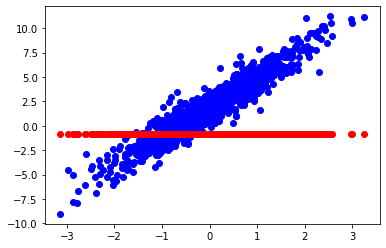

Current loss: 
17.455019


In [9]:
## Plot the model 
plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: '),
print(loss(model(inputs), outputs).numpy())

## Creating a training loop

Now that we have a model and a cost function, all we have to do is put it all together in a drive loop. To do this, we'll need to do the following: 

* Compile the gradient of our loss 
* Subtract the gradient multiplied by the learning rate to approach a minimum of our function. 
* We'll repeat the operation on the number of epochs that we'll define later *

Let's first create a function that will manage the updating of gradients 

In [13]:
## train function
def train_with_gradient_descent(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:                           # this row allows to record gradients of our loss
        current_loss = loss(model(inputs), outputs)          # calculate our loss
    dW, db = t.gradient(current_loss, [model.W, model.b])  # calculate gradients for W and b
    model.W.assign_sub(learning_rate * dW)                 # we substract the gradient * lr to approach the minimum
    model.b.assign_sub(learning_rate * db)

In [33]:
def train_with_optimizer(model, inputs, outputs, optimizer):
    var_list = [model.W, model.b]
    with tf.GradientTape() as t:                           # this row allows to record gradients of our loss
        current_loss = loss(model(inputs), outputs)          # calculate our loss
    dW, db = t.gradient(current_loss, var_list)  # calculate gradients for W and b
    optimizer.apply_gradients(zip([dW, db], var_list))

In [35]:
def train_with_optimizer2(model, inputs, outputs, optimizer):
    var_list = [model.W, model.b]
    current_loss = lambda: loss(model(inputs), outputs)
    optimizer.minimize(current_loss, var_list=var_list)

Let's start our training phase, we will define 10 epochs to approach the minimum of our cost function. We will record each of the training phases to be able to put them in a graph. 

Epoch 0, W = -1.5006335973739624, b = -1.053032398223877, loss = 29.567546844482422 
Epoch 1, W = 2.8906445503234863, b = 1.90157151222229, loss = 0.9836143851280212 
Epoch 2, W = 2.959676504135132, b = 1.9922047853469849, loss = 0.9703676104545593 
Epoch 3, W = 2.9616737365722656, b = 1.9936295747756958, loss = 0.9703615307807922 
Epoch 4, W = 2.9617068767547607, b = 1.9936708211898804, loss = 0.9703614711761475 
Epoch 5, W = 2.961707830429077, b = 1.9936714172363281, loss = 0.9703614711761475 
Epoch 6, W = 2.961707830429077, b = 1.9936715364456177, loss = 0.9703614711761475 
Epoch 7, W = 2.961707830429077, b = 1.9936715364456177, loss = 0.9703614711761475 
Epoch 8, W = 2.961707830429077, b = 1.9936715364456177, loss = 0.9703614711761475 
Epoch 9, W = 2.961707830429077, b = 1.9936715364456177, loss = 0.9703614711761475 


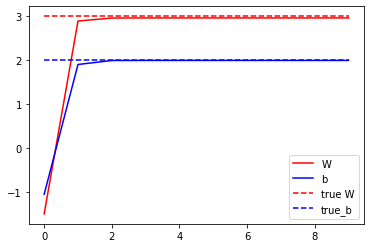

In [36]:
## Training 

model = Model()

Ws, bs = [], []
epochs = range(10)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)

for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
  
    current_loss = loss(model(inputs), outputs)
  
    train_with_optimizer(model, inputs, outputs, optimizer)
    #train_with_gradient_descent(model, inputs, outputs, 0.5)
    print("Epoch {}, W = {}, b = {}, loss = {} ".format(epoch, Ws[-1], bs[-1], current_loss))
  
plt.plot(epochs, Ws, 'r', 
         epochs, bs, 'b')

plt.plot([TRUE_W] * len(epochs), "r--",
         [TRUE_b] * len(epochs), 'b--')

plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()

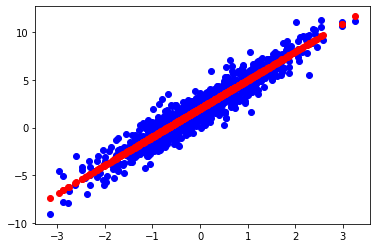

Current loss: 
0.9703615


In [32]:
plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: '),
print(loss(model(inputs), outputs).numpy())

As you can see, we very quickly arrive at a model that predicts extremely well! 

## Resources 

[Custom Training basics](https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough)   
[Writing a Training Loop from Scratch](https://www.tensorflow.org/guide/keras/writing_a_training_loop_from_scratch)   
[Optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Optimizer)